# 3.1 Simulating Data
## 3.1.1 Store Data Setting the Structure

In [42]:
k.stores <- 20 # 20 stores, using "k." for "constant"
k.weeks <- 104 # 2 years of data each

# create a data frame of initially missing values to hold the data
store.df <- data.frame(matrix(NA, ncol=10, nrow =k.stores*k.weeks))
names(store.df) <- c("storeNum", "Year", "Week", "p1sales", "p2sales", "p1price", "p2price", "p1prom", "p2prom", "country")
dim(store.df)

[1] 2080   10

In [43]:
store.num <- 101:(100+k.stores)
(store.cty <- c(rep("US", 3), rep("DE", 5), rep("GB", 3), rep("BR", 2), rep("JP", 4), rep("AU", 1),rep("CN", 2)))
length(store.cty)

[1] "US" "US" "US" "DE" "DE" "DE" "DE" "DE" "GB" "GB" "GB" "BR" "BR" "JP" "JP"
[16] "JP" "JP" "AU" "CN" "CN"

[1] 20

In [44]:
store.df$storeNum <- rep(store.num, each=k.weeks)
store.df$country <- rep(store.cty, each=k.weeks)
rm(store.num, store.cty) # clean up
(store.df$Week <- rep(1:52, times=k.stores*2))
# try the inner parts of the next line to figure out how we use rep()
(store.df$Year <- rep(rep(1:2, each=k.weeks/2), times=k.stores))

[1]  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
  [25] 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
  [49] 49 50 51 52  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20
  [73] 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44
  [97] 45 46 47 48 49 50 51 52  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16
 [121] 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40
 [145] 41 42 43 44 45 46 47 48 49 50 51 52  1  2  3  4  5  6  7  8  9 10 11 12
 [169] 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36
 [193] 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52  1  2  3  4  5  6  7  8
 [217]  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32
 [241] 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52  1  2  3  4
 [265]  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28
 [289] 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52
 [313]  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 [337] 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 [361] 49 50 51 52  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20
 [385] 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44
 [409] 45 46 47 48 49 50 51 52  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16
 [433] 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40
 [457] 41 42 43 44 45 46 47 48 49 50 51 52  1  2  3  4  5  6  7  8  9 10 11 12
 [481] 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36
 [505] 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52  1  2  3  4  5  6  7  8
 [529]  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32
 [553] 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52  1  2  3  4
 [577]  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28
 [601] 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52
 [625]  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 [649] 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 [673] 49 50 51 52  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20
 [697] 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44
 [721] 45 46 47 48 49 50 51 52  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16
 [745] 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40
 [769] 41 42 43 44 45 46 47 48 49 50 51 52  1  2  3  4  5  6  7  8  9 10 11 12
 [793] 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36
 [817] 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52  1  2  3  4  5  6  7  8
 [841]  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32
 [865] 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52  1  2  3  4
 [889]  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28
 [913] 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52
 [937]  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 [961] 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 [985] 49 50 51 52  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20
[1009] 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44
[1033] 45 46 47 48 49 50 51 52  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16
[1057] 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40
[1081] 41 42 43 44 45 46 47 48 49 50 51 52  1  2  3  4  5  6  7  8  9 10 11 12
[1105] 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36
[1129] 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52  1  2  3  4  5  6  7  8
[1153]  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32
[1177] 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52  1  2  3  4
[1201]  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 2

[1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  [38] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
  [75] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1
 [112] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [149] 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [186] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [223] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [260] 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [297] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [334] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2
 [371] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [408] 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [445] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2
 [482] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [519] 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [556] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [593] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1
 [630] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [667] 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [704] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1
 [741] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [778] 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [815] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [852] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2
 [889] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [926] 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [963] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
[1000] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
[1037] 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[1074] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
[1111] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1
[1148] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[1185] 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
[1222] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1
[1259] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[1296] 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
[1333] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[1370] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2
[1407] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
[1444] 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[1481] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2
[1518] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
[1555] 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[1592] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
[1629] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1
[1666] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[1703] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
[1740] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1
[1777] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[1814] 1 1 1 1 1 1 1 2 2 2 2 2 2 2

In [4]:
str(store.df)

'data.frame':	2080 obs. of  10 variables:
 $ storeNum: int  101 101 101 101 101 101 101 101 101 101 ...
 $ Year    : int  1 1 1 1 1 1 1 1 1 1 ...
 $ Week    : int  1 2 3 4 5 6 7 8 9 10 ...
 $ p1sales : logi  NA NA NA NA NA NA ...
 $ p2sales : logi  NA NA NA NA NA NA ...
 $ p1price : logi  NA NA NA NA NA NA ...
 $ p2price : logi  NA NA NA NA NA NA ...
 $ p1prom  : logi  NA NA NA NA NA NA ...
 $ p2prom  : logi  NA NA NA NA NA NA ...
 $ country : chr  "US" "US" "US" "US" ...


In [5]:
store.df$storeNum <- factor(store.df$storeNum)
store.df$country <- factor(store.df$country)
str(store.df)

'data.frame':	2080 obs. of  10 variables:
 $ storeNum: Factor w/ 20 levels "101","102","103",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ Year    : int  1 1 1 1 1 1 1 1 1 1 ...
 $ Week    : int  1 2 3 4 5 6 7 8 9 10 ...
 $ p1sales : logi  NA NA NA NA NA NA ...
 $ p2sales : logi  NA NA NA NA NA NA ...
 $ p1price : logi  NA NA NA NA NA NA ...
 $ p2price : logi  NA NA NA NA NA NA ...
 $ p1prom  : logi  NA NA NA NA NA NA ...
 $ p2prom  : logi  NA NA NA NA NA NA ...
 $ country : Factor w/ 7 levels "AU","BR","CN",..: 7 7 7 7 7 7 7 7 7 7 ...


In [6]:
head(store.df)
head(store.df, 120)
tail(store.df, 120)

storeNum,Year,Week,p1sales,p2sales,p1price,p2price,p1prom,p2prom,country
101,1,1,NA,NA,NA,NA,NA,NA,US
101,1,2,NA,NA,NA,NA,NA,NA,US
101,1,3,NA,NA,NA,NA,NA,NA,US
101,1,4,NA,NA,NA,NA,NA,NA,US
101,1,5,NA,NA,NA,NA,NA,NA,US
101,1,6,NA,NA,NA,NA,NA,NA,US


storeNum,Year,Week,p1sales,p2sales,p1price,p2price,p1prom,p2prom,country
101,1,1,NA,NA,NA,NA,NA,NA,US
101,1,2,NA,NA,NA,NA,NA,NA,US
101,1,3,NA,NA,NA,NA,NA,NA,US
101,1,4,NA,NA,NA,NA,NA,NA,US
101,1,5,NA,NA,NA,NA,NA,NA,US
101,1,6,NA,NA,NA,NA,NA,NA,US
101,1,7,NA,NA,NA,NA,NA,NA,US
101,1,8,NA,NA,NA,NA,NA,NA,US
101,1,9,NA,NA,NA,NA,NA,NA,US
101,1,10,NA,NA,NA,NA,NA,NA,US


,storeNum,Year,Week,p1sales,p2sales,p1price,p2price,p1prom,p2prom,country
1961,119,2,37,NA,NA,NA,NA,NA,NA,CN
1962,119,2,38,NA,NA,NA,NA,NA,NA,CN
1963,119,2,39,NA,NA,NA,NA,NA,NA,CN
1964,119,2,40,NA,NA,NA,NA,NA,NA,CN
1965,119,2,41,NA,NA,NA,NA,NA,NA,CN
1966,119,2,42,NA,NA,NA,NA,NA,NA,CN
1967,119,2,43,NA,NA,NA,NA,NA,NA,CN
1968,119,2,44,NA,NA,NA,NA,NA,NA,CN
1969,119,2,45,NA,NA,NA,NA,NA,NA,CN
1970,119,2,46,NA,NA,NA,NA,NA,NA,CN


## 3.1.2 Store Data: Simulating Data Points

In [45]:
set.seed(98250)
store.df$p1prom <- rbinom(n=nrow(store.df), size=1, p=0.1) # 10% promoted
store.df$p2prom <- rbinom(n=nrow(store.df), size=1, p=0.15) # 15% promoted
head(store.df)

storeNum,Year,Week,p1sales,p2sales,p1price,p2price,p1prom,p2prom,country
101,1,1,NA,NA,NA,NA,0,0,US
101,1,2,NA,NA,NA,NA,0,0,US
101,1,3,NA,NA,NA,NA,1,0,US
101,1,4,NA,NA,NA,NA,0,0,US
101,1,5,NA,NA,NA,NA,0,1,US
101,1,6,NA,NA,NA,NA,0,0,US


In [46]:
store.df$p1price <- sample(x=c(2.19, 2.29, 2.49, 2.79, 2.99), size=nrow(store.df), replace=TRUE)
store.df$p2price <- sample(x=c(2.29, 2.49, 2.59, 2.99, 3.19), size=nrow(store.df), replace=TRUE)
head(store.df)

storeNum,Year,Week,p1sales,p2sales,p1price,p2price,p1prom,p2prom,country
101,1,1,NA,NA,2.29,2.29,0,0,US
101,1,2,NA,NA,2.49,2.49,0,0,US
101,1,3,NA,NA,2.99,2.99,1,0,US
101,1,4,NA,NA,2.99,3.19,0,0,US
101,1,5,NA,NA,2.49,2.59,0,1,US
101,1,6,NA,NA,2.79,2.49,0,0,US


In [47]:
# sales data, using Poisson (counts) distribution, rpois()
# first, the default sales in the absence of promotion 
tmp.sales1 <- rpois(nrow(store.df), lambda=120)
tmp.sales2 <- rpois(nrow(store.df), lambda=100)

# scale sales according to the ratio of log(price)
tmp.sales1 <- tmp.sales1 * log(store.df$p2price) / log(store.df$p1price)
tmp.sales2 <- tmp.sales2 * log(store.df$p1price) / log(store.df$p2price)

# final sales get a 30% or 40% lift when promoted
store.df$p1sales <- floor(tmp.sales1 * (1 + store.df$p1prom * 0.3))
store.df$p2sales <- floor(tmp.sales2 * (1 + store.df$p2prom * 0.4))
head(store.df)

storeNum,Year,Week,p1sales,p2sales,p1price,p2price,p1prom,p2prom,country
101,1,1,127,106,2.29,2.29,0,0,US
101,1,2,137,105,2.49,2.49,0,0,US
101,1,3,156,97,2.99,2.99,1,0,US
101,1,4,117,106,2.99,3.19,0,0,US
101,1,5,138,100,2.49,2.59,0,1,US
101,1,6,115,127,2.79,2.49,0,0,US


In [48]:
# install.packages("car")
library(car)
some(store.df, 10)

,storeNum,Year,Week,p1sales,p2sales,p1price,p2price,p1prom,p2prom,country
27,101,1,27,135,99,2.29,2.49,0,0,US
144,102,1,40,123,113,2.79,2.59,0,0,US
473,105,2,5,127,96,2.99,3.19,0,0,DE
488,105,2,20,92,127,2.79,2.29,0,0,DE
1035,110,2,47,125,100,2.49,2.59,0,0,GB
1554,115,2,46,142,87,2.29,2.59,0,0,JP
1564,116,1,4,124,93,2.19,2.49,0,0,JP
1584,116,1,24,148,71,2.49,3.19,0,0,JP
1885,119,1,13,133,100,2.29,2.59,0,0,CN
1965,119,2,41,112,109,2.19,2.29,0,0,CN


# 3.2 Functions to Summarize a Variable



2.19 2.29 2.49 2.79 2.99 
 395  444  423  443  375 

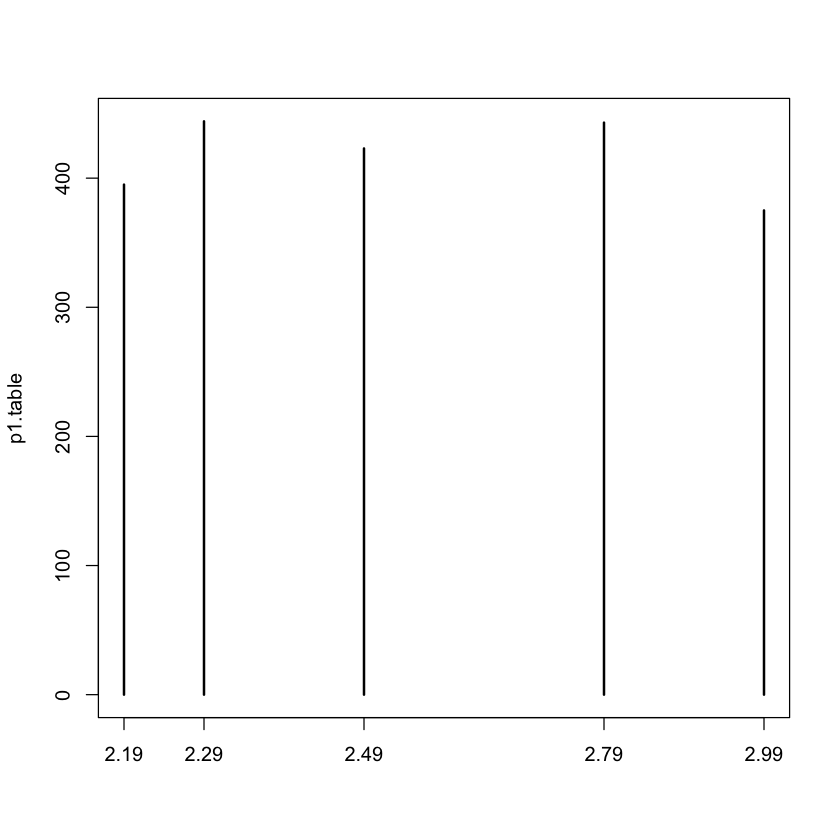

In [49]:
p1.table <- table(store.df$p1price)
p1.table
plot(p1.table)

# 3.2 Functions to Summarize a Variable
## 3.2.1 Discrete Variables

In [51]:
table(store.df$p1price, store.df$p1prom)

      
         0   1
  2.19 354  41
  2.29 398  46
  2.49 381  42
  2.79 396  47
  2.99 343  32

In [52]:
p1.table2 <- table(store.df$p1price, store.df$p1prom)
p1.table2[,2] / (p1.table2[,1] + p1.table2[,2])

2.19       2.29       2.49       2.79       2.99 
0.10379747 0.10360360 0.09929078 0.10609481 0.08533333

## 3.2.2 Countimuous Variables

In [54]:
min(store.df$p1sales)
max(store.df$p1sales)
mean(store.df$p1sales)
median(store.df$p1sales)
var(store.df$p1sales)
sd(store.df$p1sales)
IQR(store.df$p1sales) # Interquartile range, 75th-25th percentile 
mad(store.df$p1sales) # Median absolute devaition
quantile(store.df$p1sales, probs=c(0.25, 0.5, 0.75))

[1] 73

[1] 263

[1] 133.0486

[1] 129

[1] 805.0044

[1] 28.3726

[1] 37

[1] 26.6868

25% 50% 75% 
113 129 150

In [55]:
quantile(store.df$p1sales, probs = c(0.05, 0.95)) # central 90% of data
quantile(store.df$p1sales, probs = 0:10/10)

5% 95% 
 93 184

0%   10%   20%   30%   40%   50%   60%   70%   80%   90%  100% 
 73.0 100.0 109.0 117.0 122.6 129.0 136.0 145.0 156.0 171.0 263.0

In [56]:
mysummary.df <- data.frame(matrix(NA, nrow=2, ncol=2))
names(mysummary.df) <- c("Median Sales", "IQR")
rownames(mysummary.df) <- c("Product 1", "Product 2")
mysummary.df["Product 1", "Median Sales"] <- median(store.df$p1sales)
mysummary.df["Product 2", "Median Sales"] <- median(store.df$p2sales)
mysummary.df["Product 1", "IQR"] <- IQR(store.df$p1sales)
mysummary.df["Product 2", "IQR"] <- IQR(store.df$p2sales)
mysummary.df

,Median Sales,IQR
Product 1,129,37
Product 2,96,29


# 3.3 Summarizing Data Frames
## 3.3.1 summary()

In [17]:
summary(store.df)

    storeNum         Year          Week          p1sales       p2sales     
 101    : 104   Min.   :1.0   Min.   : 1.00   Min.   : 73   Min.   : 51.0  
 102    : 104   1st Qu.:1.0   1st Qu.:13.75   1st Qu.:113   1st Qu.: 84.0  
 103    : 104   Median :1.5   Median :26.50   Median :129   Median : 96.0  
 104    : 104   Mean   :1.5   Mean   :26.50   Mean   :133   Mean   :100.2  
 105    : 104   3rd Qu.:2.0   3rd Qu.:39.25   3rd Qu.:150   3rd Qu.:113.0  
 106    : 104   Max.   :2.0   Max.   :52.00   Max.   :263   Max.   :225.0  
 (Other):1456                                                              
    p1price         p2price         p1prom        p2prom       country 
 Min.   :2.190   Min.   :2.29   Min.   :0.0   Min.   :0.0000   AU:104  
 1st Qu.:2.290   1st Qu.:2.49   1st Qu.:0.0   1st Qu.:0.0000   BR:208  
 Median :2.490   Median :2.59   Median :0.0   Median :0.0000   CN:208  
 Mean   :2.544   Mean   :2.70   Mean   :0.1   Mean   :0.1385   DE:520  
 3rd Qu.:2.790   3rd Qu.:2.99   

In [18]:
summary(store.df$Year)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    1.0     1.0     1.5     1.5     2.0     2.0 

In [19]:
summary(store.df, digits = 2)

    storeNum         Year          Week       p1sales       p2sales   
 101    : 104   Min.   :1.0   Min.   : 1   Min.   : 73   Min.   : 51  
 102    : 104   1st Qu.:1.0   1st Qu.:14   1st Qu.:113   1st Qu.: 84  
 103    : 104   Median :1.5   Median :26   Median :129   Median : 96  
 104    : 104   Mean   :1.5   Mean   :26   Mean   :133   Mean   :100  
 105    : 104   3rd Qu.:2.0   3rd Qu.:39   3rd Qu.:150   3rd Qu.:113  
 106    : 104   Max.   :2.0   Max.   :52   Max.   :263   Max.   :225  
 (Other):1456                                                         
    p1price       p2price        p1prom        p2prom     country 
 Min.   :2.2   Min.   :2.3   Min.   :0.0   Min.   :0.00   AU:104  
 1st Qu.:2.3   1st Qu.:2.5   1st Qu.:0.0   1st Qu.:0.00   BR:208  
 Median :2.5   Median :2.6   Median :0.0   Median :0.00   CN:208  
 Mean   :2.5   Mean   :2.7   Mean   :0.1   Mean   :0.14   DE:520  
 3rd Qu.:2.8   3rd Qu.:3.0   3rd Qu.:0.0   3rd Qu.:0.00   GB:312  
 Max.   :3.0   Max.   :3.2   M

## 3.3.2 describe()

In [20]:
# install.packages("psych")
library(psych)
describe(store.df)


Attaching package: ‘psych’

The following object is masked from ‘package:car’:

    logit



,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
storeNum*,1,2080,10.5000000,5.7676679,10.50,10.50000000,7.41300,1.00,20.00,19.0,0.0000000,-1.2077396,0.126464485
Year,2,2080,1.5000000,0.5001202,1.50,1.50000000,0.74130,1.00,2.00,1.0,0.0000000,-2.0009613,0.010965862
Week,3,2080,26.5000000,15.0119401,26.50,26.50000000,19.27380,1.00,52.00,51.0,0.0000000,-1.2026174,0.329158561
p1sales,4,2080,133.0485577,28.3725990,129.00,131.08052885,26.68680,73.00,263.00,190.0,0.7393500,0.6565010,0.622110387
p2sales,5,2080,100.1567308,24.4241905,96.00,98.05168269,22.23900,51.00,225.00,174.0,0.9902065,1.5133064,0.535535803
p1price,6,2080,2.5443750,0.2948819,2.49,2.53296875,0.44478,2.19,2.99,0.8,0.2773973,-1.4426746,0.006465714
p2price,7,2080,2.6995192,0.3292181,2.59,2.68939904,0.44478,2.29,3.19,0.9,0.3168365,-1.3978820,0.007218585
p1prom,8,2080,0.1000000,0.3000721,0.00,0.00000000,0.00000,0.00,1.00,1.0,2.6647438,5.1033138,0.006579517
p2prom,9,2080,0.1384615,0.3454668,0.00,0.04807692,0.00000,0.00,1.00,1.0,2.0920368,2.3777619,0.007574861
country*,10,2080,4.5500000,1.7172413,4.50,4.62500000,2.22390,1.00,7.00,6.0,-0.2922095,-0.8077303,0.037653007


In [21]:
describe(store.df[,c(2,4:9)])

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
Year,1,2080,1.5000000,0.5001202,1.50,1.50000000,0.74130,1.00,2.00,1.0,0.0000000,-2.000961,0.010965862
p1sales,2,2080,133.0485577,28.3725990,129.00,131.08052885,26.68680,73.00,263.00,190.0,0.7393500,0.656501,0.622110387
p2sales,3,2080,100.1567308,24.4241905,96.00,98.05168269,22.23900,51.00,225.00,174.0,0.9902065,1.513306,0.535535803
p1price,4,2080,2.5443750,0.2948819,2.49,2.53296875,0.44478,2.19,2.99,0.8,0.2773973,-1.442675,0.006465714
p2price,5,2080,2.6995192,0.3292181,2.59,2.68939904,0.44478,2.29,3.19,0.9,0.3168365,-1.397882,0.007218585
p1prom,6,2080,0.1000000,0.3000721,0.00,0.00000000,0.00000,0.00,1.00,1.0,2.6647438,5.103314,0.006579517
p2prom,7,2080,0.1384615,0.3454668,0.00,0.04807692,0.00000,0.00,1.00,1.0,2.0920368,2.377762,0.007574861


## 3.3.4 apply()

In [22]:
apply(store.df[,2:9],MARGIN = 2, FUN = mean)

Year        Week     p1sales     p2sales     p1price     p2price 
  1.5000000  26.5000000 133.0485577 100.1567308   2.5443750   2.6995192 
     p1prom      p2prom 
  0.1000000   0.1384615

In [23]:
apply(store.df[,2:9], 1, mean)

[1] 29.9475 31.2475 32.9975 29.2725 31.2600 31.7850 27.5225 30.7850 28.0725
  [10] 31.5600 30.5975 32.5850 25.6350 29.3225 27.9225 30.5350 31.4475 31.6600
  [19] 29.4225 31.0350 30.2475 31.5975 31.6850 34.5100 30.3350 29.7975 33.3475
  [28] 32.3850 33.7475 35.1600 30.8725 33.9725 29.5975 42.2225 34.6350 36.7475
  [37] 31.8975 32.7225 35.1475 35.8100 33.2850 38.6350 35.0600 33.7600 32.3850
  [46] 36.3850 40.2850 33.6475 35.9475 35.1975 35.3475 35.9100 28.6225 27.0600
  [55] 35.7600 29.4725 32.0975 28.6225 26.1225 29.3225 32.5350 27.5600 30.5100
  [64] 34.5850 29.4225 35.0225 30.3350 34.0350 33.6725 33.0350 34.5850 33.5600
  [73] 28.8225 34.2850 35.8725 32.4725 31.8600 37.0850 31.2850 30.6225 34.7975
  [82] 34.0225 36.5975 40.2225 31.0600 32.7475 35.3725 30.5975 29.2225 34.2850
  [91] 35.2475 35.9850 33.9350 36.2725 41.5600 35.0350 33.3725 36.8975 35.8850
 [100] 39.5600 31.9725 38.8975 39.9225 37.6225 30.3850 30.8100 26.0350 32.4225
 [109] 25.6100 30.2350 27.4350 29.0225 38.7725 29.1850 33.2850 31.0975 31.3725
 [118] 30.6850 39.4100 30.0975 30.7600 30.5725 28.0725 39.8100 30.1725 31.9100
 [127] 29.5975 33.2100 35.5975 35.5225 32.9725 33.8600 34.7975 33.2850 36.7475
 [136] 31.0225 31.5975 29.8725 30.5725 33.7975 34.8100 36.2850 33.7225 35.2975
 [145] 32.4600 37.1475 32.2475 32.3225 31.9975 34.8725 29.5975 34.2850 31.6975
 [154] 36.6350 37.2850 40.5850 24.4475 39.9350 29.8600 29.0225 31.8475 29.4975
 [163] 39.4350 25.2225 31.9350 32.6475 30.5975 29.3100 30.9350 32.1725 36.1100
 [172] 32.4100 32.7225 30.9850 36.1725 36.2850 32.5975 33.0225 33.4725 34.0975
 [181] 31.5975 35.5600 32.6225 30.8100 33.2975 38.8725 30.9600 32.9850 33.4725
 [190] 35.1350 31.2475 37.0850 34.3100 38.5350 35.3850 36.8100 32.7100 34.4350
 [199] 35.9975 43.3350 38.4350 36.1600 41.6850 33.9975 34.9725 36.9100 38.6975
 [208] 35.0975 27.9975 29.1225 37.9350 27.3350 36.2350 27.3850 28.0350 36.2225
 [217] 31.5975 29.9725 31.2225 29.9100 29.3100 37.2350 33.0975 27.4725 31.5975
 [226] 30.3475 33.7600 33.6600 30.4975 30.8600 33.3100 42.3350 34.9350 30.6600
 [235] 32.7725 34.6100 31.8975 42.7100 31.4475 32.9475 37.4350 38.6350 31.1100
 [244] 33.0475 36.9975 38.6100 37.6225 34.4350 32.3850 39.5100 35.0600 33.6725
 [253] 43.4725 32.8100 34.4975 33.3975 34.4475 37.9725 40.6725 36.7225 26.3725
 [262] 31.9350 33.6600 28.6600 38.4725 25.9475 29.5475 28.6100 31.3350 38.1350
 [271] 29.4975 29.5350 29.5350 30.0600 37.3725 29.3725 29.3350 29.5100 35.6850
 [280] 31.0100 39.6850 30.0975 30.8725 33.0225 32.6725 33.1975 42.4725 31.2225
 [289] 38.8725 30.5225 34.5225 33.9100 32.3975 33.4350 32.1600 41.0975 38.2975
 [298] 38.4975 37.5725 32.8850 40.3850 37.6725 33.4725 37.2975 38.1600 40.0225
 [307] 35.8975 36.6225 35.9975 34.5475 37.9850 36.4100 29.6475 32.0475 33.6225
 [316] 29.7850 31.4100 30.2600 30.7475 34.9975 30.4350 26.8100 29.7600 28.5725
 [325] 29.3225 26.2225 32.9600 31.5600 34.2100 29.5975 31.7600 31.8725 32.9475
 [334] 31.9100 33.7725 34.1725 32.7225 32.2600 29.9725 30.9100 34.6475 31.9975
 [343] 31.7225 32.3850 35.4975 30.0100 32.1600 31.1975 33.9975 34.0600 31.6225
 [352] 35.4850 37.7225 33.6475 36.9225 35.1850 31.0475 33.0100 36.9225 34.9600
 [361] 34.3100 36.7475 42.8600 36.5350 27.1475 31.3725 32.1100 31.3100 30.3975
 [370] 30.9475 29.8100 29.0100 29.7475 31.4600 31.8975 31.4100 33.1975 28.4725
 [379] 35.3100 28.2225 29.5350 29.6975 30.9975 36.1850 31.1975 37.4600 33.3475
 [388] 32.9350 39.2725 31.4725 31.4850 30.3850 35.9600 37.7475 30.5225 32.5975
 [397] 32.3725 33.8100 42.8100 33.9850 34.9225 33.6350 37.7975 35.2975 33.4475
 [406] 34.3975 33.0100 41.0975 34.1100 37.3350 38.6600 36.2100 33.1600 33.9725
 [415] 37.0475 35.0600 26.6350 30.0600 25.4350 30.0850 33.5725 28.4975 30.5475
 [424] 30.6350 28.4725 27.4725 33.8100 30.8600 27.7100 33.4350 33.5350 28.4100
 [433] 32.3100 31.4100 35.7850 31.6850 32.2725 31.1225 28.8850 34.2975 32.0725
 [442] 28.1850 39.7850 32.7350 38.7975 33.2850 40.5225 33.6975 29.7475 32.4475
 [451] 33.4975 38.0475 32.7725 32.8100 32.9725 33.935

In [24]:
apply(store.df[,2:9], 2, sum)

Year     Week  p1sales  p2sales  p1price  p2price   p1prom   p2prom 
  3120.0  55120.0 276741.0 208326.0   5292.3   5615.0    208.0    288.0

In [25]:
apply(store.df[,2:9], 2, sd)

Year       Week    p1sales    p2sales    p1price    p2price     p1prom 
 0.5001202 15.0119401 28.3725990 24.4241905  0.2948819  0.3292181  0.3000721 
    p2prom 
 0.3454668

In [26]:
apply(store.df[,2:9], 2, function(x){mean(x)-median(x)})

Year      Week   p1sales   p2sales   p1price   p2price    p1prom    p2prom 
0.0000000 0.0000000 4.0485577 4.1567308 0.0543750 0.1095192 0.1000000 0.1384615

In [27]:
mysummary2.df <- data.frame(matrix(NA, nrow=2, ncol=2))
names(mysummary2.df) <- c("Median Sales", "IQR")
rownames(mysummary2.df) <- names(store.df)[4:5]
mysummary2.df[, "Median Sales"] <- apply(store.df[, 4:5], 2, median)
mysummary2.df[, "IQR"] <- apply(store.df[, 4:5], 2, IQR)
mysummary2.df

,Median Sales,IQR
p1sales,129,37
p2sales,96,29


# 3.4 Single Variable Visualization
## 3.4.1 Histograms

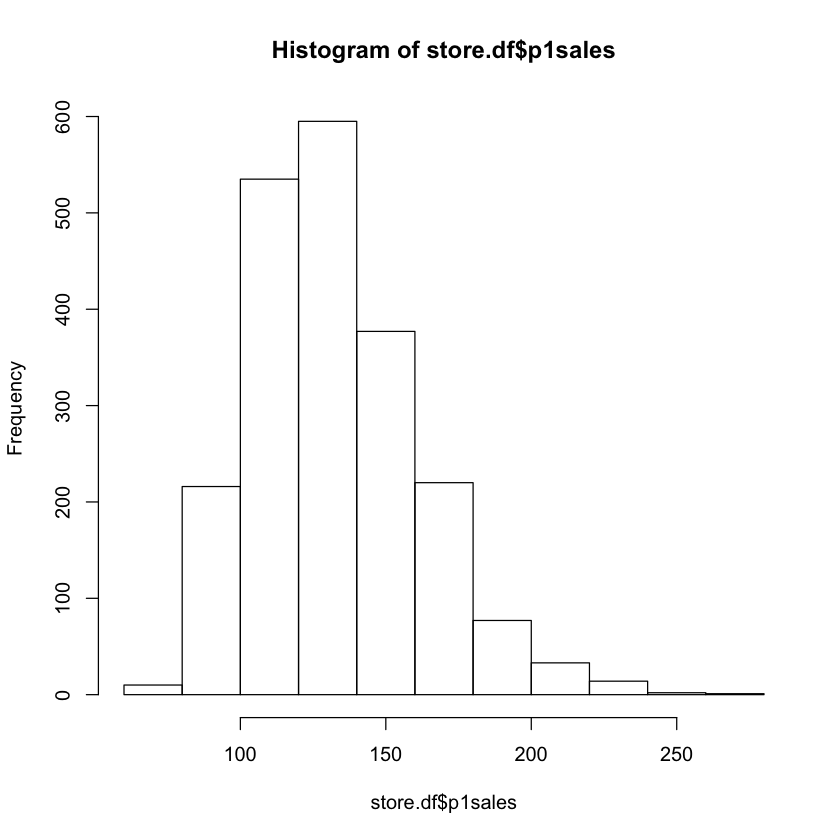

In [28]:
hist(store.df$p1sales)

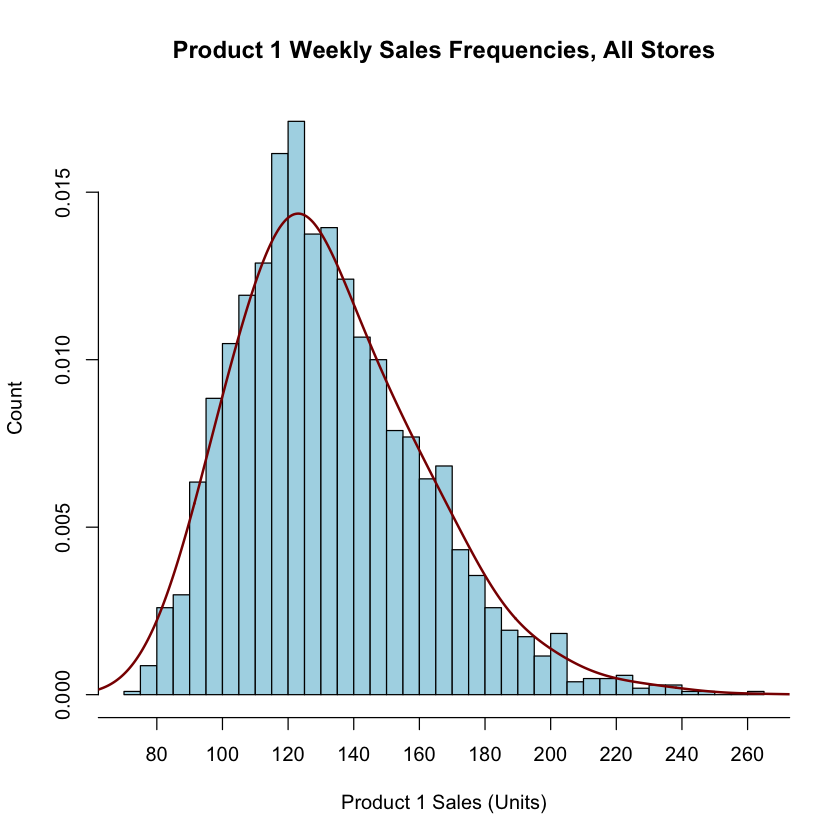

In [29]:
hist(store.df$p1sales, 
     main="Product 1 Weekly Sales Frequencies, All Stores", 
     xlab="Product 1 Sales (Units)", 
     ylab="Count",
    breaks=30,
    col="lightblue",
    freq=FALSE,
    xaxt="n")
axis(side=1, at=seq(60, 300, by=20)) # add "60","80",...
lines(density(store.df$p1sales, bw=10),
     type="l", col="darkred", lwd=2)

## 3.4.2 Boxplots

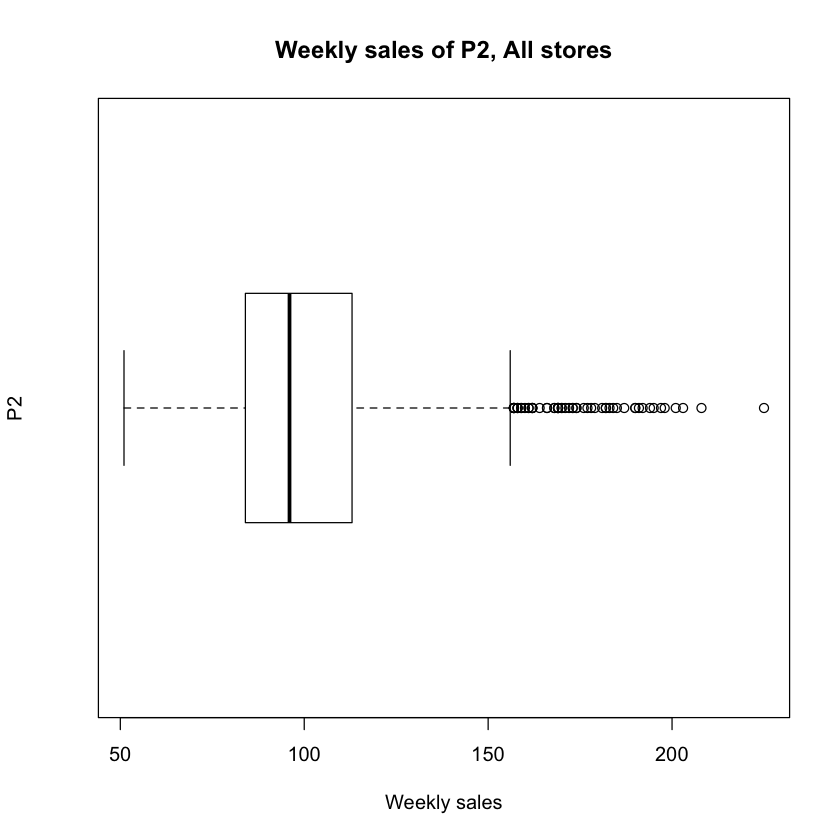

In [30]:
boxplot(store.df$p2sales, xlab="Weekly sales", ylab="P2",
       main="Weekly sales of P2, All stores", horizontal=TRUE)

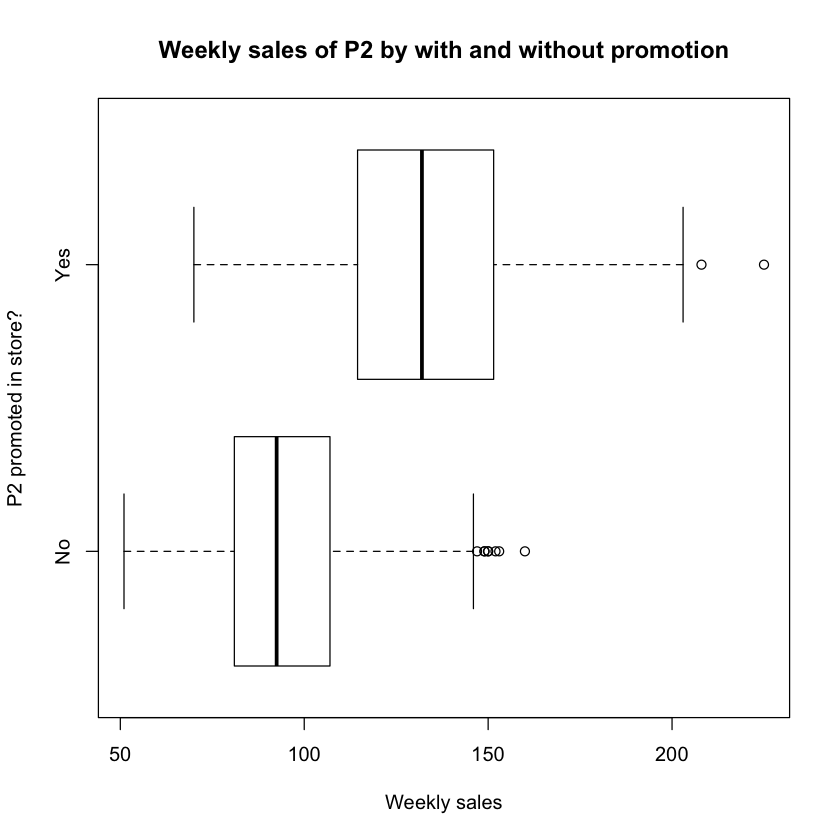

In [31]:
boxplot(p2sales ~ p2prom, data=store.df,  horizontal=TRUE, yaxt="n",
        xlab="Weekly sales", ylab="P2 promoted in store?", 
       main="Weekly sales of P2 by with and without promotion")
axis(side=2, at=c(1,2), labels=c("No","Yes"))

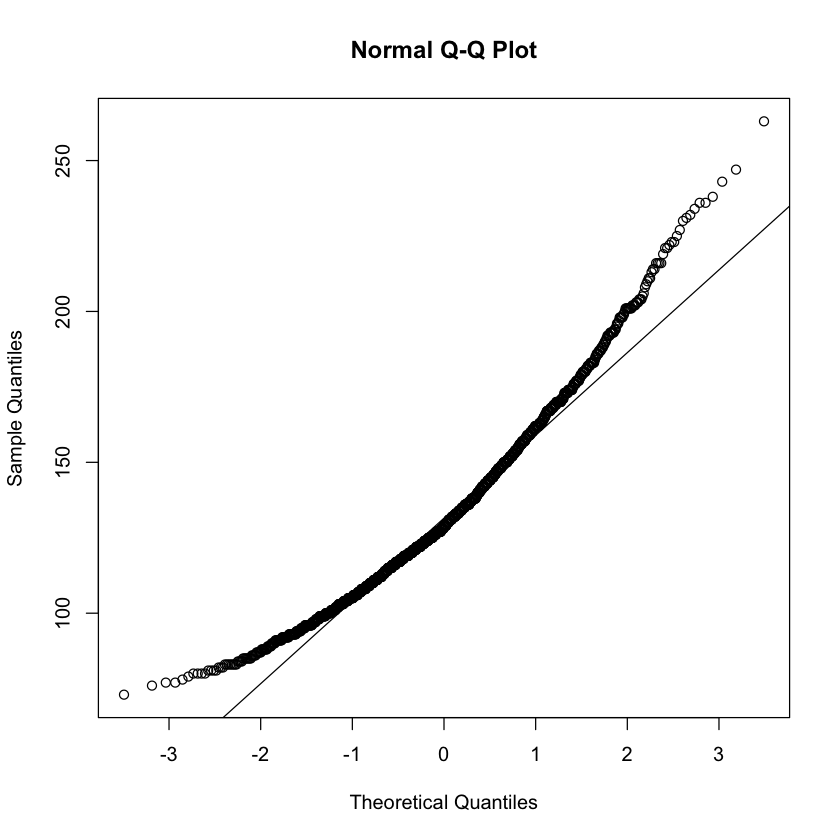

In [32]:
qqnorm(store.df$p1sales)
qqline(store.df$p1sales)

## 3.4.3 QQ Plot to Check Normality

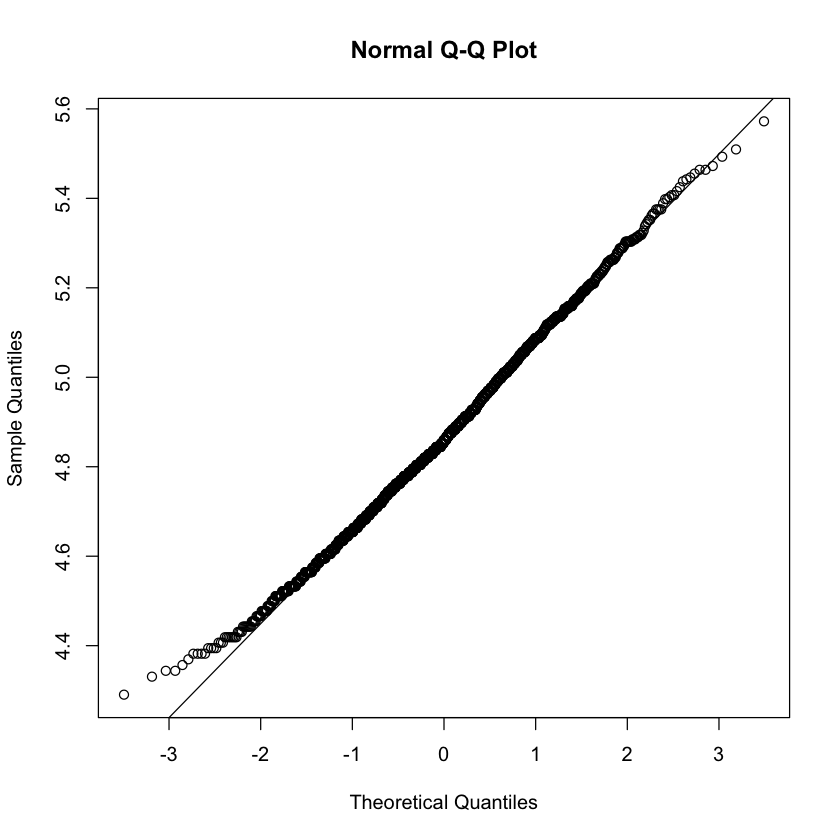

In [33]:
qqnorm(log(store.df$p1sales))
qqline(log(store.df$p1sales))

## 3.4.4 Cumulative Distribution

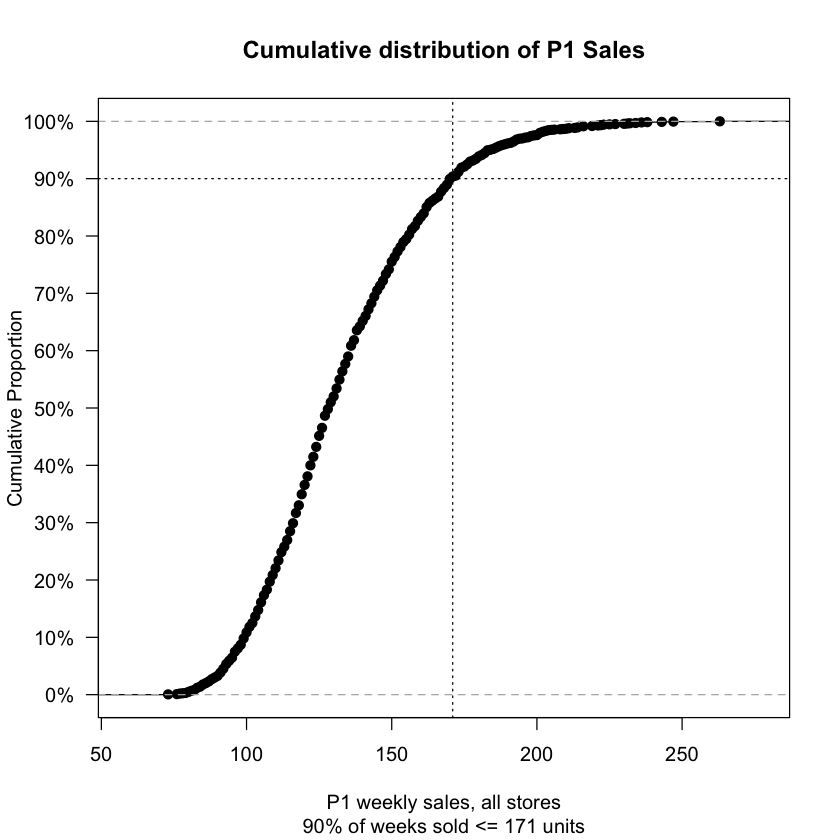

In [57]:
plot(ecdf(store.df$p1sales),
    main="Cumulative distribution of P1 Sales",
    ylab="Cumulative Proportion",
    xlab=c("P1 weekly sales, all stores", "90% of weeks sold <= 171 units"),
    yaxt="n")
axis(side=2, at=seq(0, 1, by=0.1), las=1,
                   labels=paste(seq(0,100,by=10), "%", sep=""))
abline(h=0.9, lty=3)
abline(v=quantile(store.df$p1sales, p =0.9), lty=3)

## 3.4.5 Language Brief: by() and aggregate()

In [58]:
by(store.df$p1sales, store.df$storeNum, mean)
# store.df$storeNum の値ごとにstore.df$p1sales の mean をとる

store.df$storeNum: 101
[1] 130.5385
------------------------------------------------------------ 
store.df$storeNum: 102
[1] 134.7404
------------------------------------------------------------ 
store.df$storeNum: 103
[1] 136.0385
------------------------------------------------------------ 
store.df$storeNum: 104
[1] 131.4423
------------------------------------------------------------ 
store.df$storeNum: 105
[1] 129.5288
------------------------------------------------------------ 
store.df$storeNum: 106
[1] 133.7981
------------------------------------------------------------ 
store.df$storeNum: 107
[1] 133.8077
------------------------------------------------------------ 
store.df$storeNum: 108
[1] 133.6923
------------------------------------------------------------ 
store.df$storeNum: 109
[1] 131.5481
------------------------------------------------------------ 
store.df$storeNum: 110
[1] 132.0962
------------------------------------------------------------ 
store.df$storeNum: 1

In [59]:
by(store.df$p1sales, list(store.df$storeNum, store.df$Year), mean)
# store.df$storeNum の値，store.df$Year の値ごとにstore.df$p1sales の mean をとる

: 101
: 1
[1] 127.7885
------------------------------------------------------------ 
: 102
: 1
[1] 129.7115
------------------------------------------------------------ 
: 103
: 1
[1] 133.2308
------------------------------------------------------------ 
: 104
: 1
[1] 128.0769
------------------------------------------------------------ 
: 105
: 1
[1] 129.7692
------------------------------------------------------------ 
: 106
: 1
[1] 131.5
------------------------------------------------------------ 
: 107
: 1
[1] 131.1154
------------------------------------------------------------ 
: 108
: 1
[1] 134.8077
------------------------------------------------------------ 
: 109
: 1
[1] 129.8269
------------------------------------------------------------ 
: 110
: 1
[1] 132.6923
------------------------------------------------------------ 
: 111
: 1
[1] 130.8654
------------------------------------------------------------ 
: 112
: 1
[1] 134.5
------------------------------------------------

In [37]:
p1sales.sum <- aggregate(store.df$p1sales,
                        by=list(country=store.df$country), sum)
p1sales.sum

country,x
AU,14544
BR,27836
CN,27381
DE,68876
GB,40986
JP,55381
US,41737


## 3.4.6 Maps

In [40]:
library(rworldmap)
library(RColorBrewer)
p1sales.map <- joinCountryData2Map(p1sales.sum, joinCode = "ISO2", nameJoinColumn = "country")

7 codes from your data successfully matched countries in the map
0 codes from your data failed to match with a country code in the map
235 codes from the map weren't represented in your data


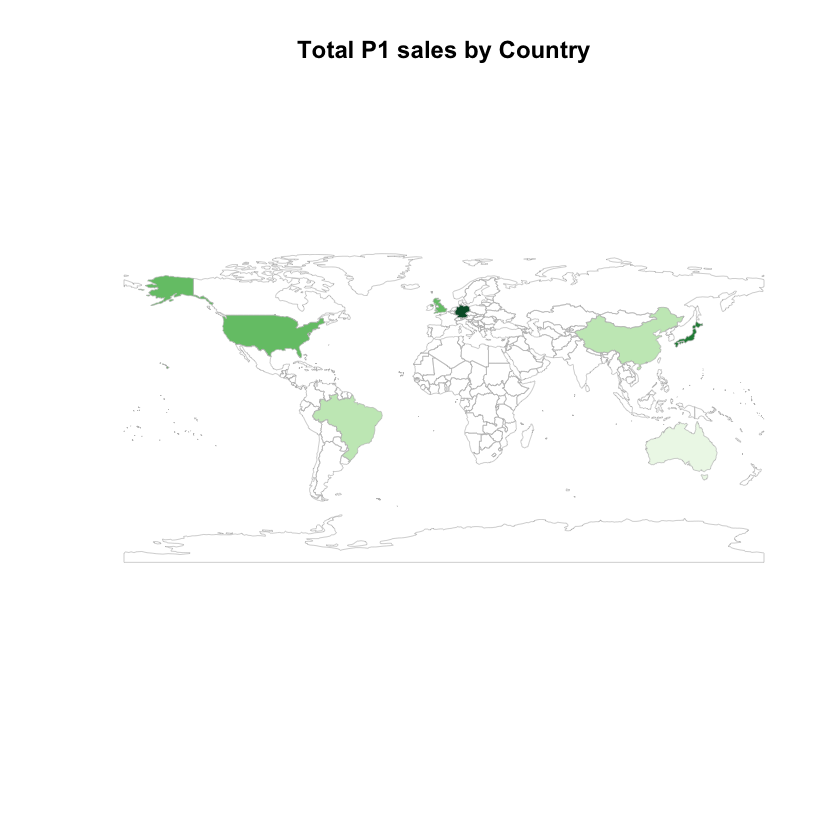

In [41]:
mapCountryData(p1sales.map, nameColumnToPlot = "x", mapTitle = "Total P1 sales by Country",
              colourPalette = brewer.pal(7, "Greens"), catMethod="fixedWidth", addLegend=FALSE)